In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from os import chdir
from glob import glob
import pandas as pd
import glob
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"


def mergeCSV(file_list):
    df_merge=pd.DataFrame()
    for file in file_list:
        df=pd.read_csv(file, header=None)
        df_merge=pd.concat([df, df_merge], ignore_index=True, sort=False)
    print(df_merge.shape)
    
    return df_merge


file_list=[]
for filepath in glob.iglob(r'C:/Users/antonebert/Desktop/WS2021 Programing/MADI/Activity Recognition from Single Chest-Mounted Accelerometer/*.csv'):
    file_list.append(filepath)

df_merged_csv=mergeCSV(file_list)

(1926896, 5)


In [3]:
df=df_merged_csv.drop(columns=[0])
df.head(-5)
df.columns=['x','y','z','label']

df=df[df["label"] != 0] #data cleaning: Leaving out unlabeled data || (3719, 4)
#df_null.head()
print(df.shape)
#cl=[1,3,4]
df=df[(df["label"] == 1) | (df["label"] == 3) | (df["label"] == 4)]
#df[df['label'].isin(cl)]
df.shape

(1923177, 4)


(1182468, 4)

## Data are separated by participant
Each file contains the following information
sequential number, x acceleration, y acceleration, z acceleration, label
Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing


#### Class Distribution 

<AxesSubplot:xlabel='label', ylabel='count'>

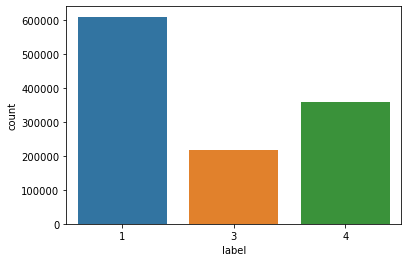

In [4]:
sns.countplot(x = 'label', data=df)

In [5]:
df = shuffle(df)
df.head(-5)

,x,y,z,label
1162180,2136,2539,2050,1
1142860,2086,2536,2011,1
53318,2172,2494,2019,4
1491746,1876,2320,2084,4
314545,2197,2305,1804,1
...,...,...,...,...
1300448,1804,2421,2017,4
1443455,1958,2344,2069,1
1433013,1766,2233,1781,1
204036,1800,2339,1997,1


In [6]:
#Create input output data
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

<bound method NDFrame.head of            x     y     z  label
0       1868  2375  2077      1
1       2348  2381  1857      1
2       1974  2376  2120      1
3       2218  2245  1765      1
4       2022  2533  2036      1
...      ...   ...   ...    ...
650206  1957  2552  1856      4
650207  2005  2391  1803      4
650208  2006  2414  1821      4
650209  2015  2282  1839      4
650210  1918  2343  2062      4

[650211 rows x 4 columns]>


<AxesSubplot:xlabel='label', ylabel='count'>

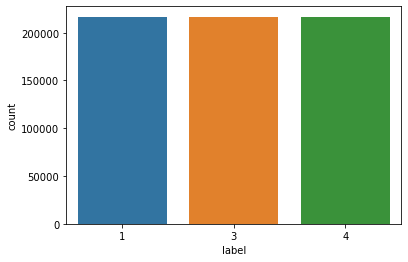

In [8]:
#Under Sample
rus= RandomUnderSampler(random_state=0)
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_sample(X,y)
df_resample = pd.concat([X_resampled,y_resampled], axis = 1)
print(df_resample.head)
sns.countplot(x = 'label', data=df_resample)

In [9]:
# Split into train+val (80%) and test(20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69) 

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=66)

In [10]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [11]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=5) #cv=cross validation 3fold, 5fold, 7fold etc

In [12]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[64359  3104  3860]
 [ 3152 50610 17763]
 [ 3963 11941 55818]]


=== Classification Report ===
              precision    recall  f1-score   support

           1       0.90      0.90      0.90     71323
           3       0.77      0.71      0.74     71525
           4       0.72      0.78      0.75     71722

    accuracy                           0.80    214570
   macro avg       0.80      0.80      0.80    214570
weighted avg       0.80      0.80      0.80    214570



=== All AUC Scores ===
[0.84104036 0.8399452  0.84036804 0.8402236  0.84120037]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8405555163547275


Data are separated by participant
Each file contains the following information sequential number, x acceleration, y acceleration, z acceleration, label Labels are codified by numbers

1: Working at Computer

2: Standing Up, Walking and Going updown stairs

3: Standing

4: Walking

5: Going UpDown Stairs

6: Walking and Talking with Someone

7: Talking while Standing